# Team Project - Get to know your data
## Team 4: Qiqi Wang, Jiachen Wang, Yanli pei, Honggeun Jo

## Objectives
### 1. Evaluate data coverage, sampling
### 2. Calculate and characterize the facies, porosity, perm and AI distributions
        location maps and histograms, summary statistics, outliers
### 3. Compare the well-based and seismic acoustic impedance
        is there likely issues of sampling bias 
### 4. Plot location map: wells and map of AI
        identify and features of interest for reservoir potential

# 0. Load package, initial setting, and fetching data

In [1]:
## Import needed package
import os                                                   # set current working directory 
import numpy as np                                          # ndarrays
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # plotting
from scipy import stats                                     # summary stats
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

## Set Working Directory
os.chdir("C:/Users/hj6488/Box Sync/04_Course work (Spring 2019)/200-Stoch Method for Reservoir Modeling/203 Team Project - Data Loading and Analysis")  # set the working directory

# Load Data 
df = pd.read_csv("4_sample_data.csv")                       # well sample data
AI_map = np.loadtxt("4_AI.csv", delimiter = ",")            # AI map 

It seems that the first column seems not needed...

In [2]:
df.head()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,5,70.0,580.0,1.0,0.102475,30.149009,3477.934210
1,15,140.0,860.0,1.0,0.086987,8.540175,3500.807463
2,22,140.0,370.0,1.0,0.091117,266.893061,3478.303116
3,23,140.0,300.0,1.0,0.097404,5.483678,3428.434722
4,24,140.0,230.0,1.0,0.089087,29.146330,3853.554854


In [3]:
df_subset = df.iloc[:,1:7] 
df_subset.head()

,X,Y,Facies,Porosity,Perm,AI
0,70.0,580.0,1.0,0.102475,30.149009,3477.934210
1,140.0,860.0,1.0,0.086987,8.540175,3500.807463
2,140.0,370.0,1.0,0.091117,266.893061,3478.303116
3,140.0,300.0,1.0,0.097404,5.483678,3428.434722
4,140.0,230.0,1.0,0.089087,29.146330,3853.554854


In [4]:
print ("The number of well data sample is %.0f, \n and total number of reservoir cells are %.0f" % (df_subset.shape[0], AI_map.shape[0]*AI_map.shape[1]))

The number of well data sample is 178, 
 and total number of reservoir cells are 10000


# 1.Data Coverage

In [5]:
num_data=df_subset.shape[0]
num_total=AI_map.shape[0]*AI_map.shape[1]
print("Well samples cover %.3f %%" % (num_data/num_total*100))

Well samples cover 1.780 %


# 2. Calculate and characterize the facies, porosity, perm and AI distributions


1) Location map
2) histograms
3) summary statistics
4) Outlier

### 1) Location map 

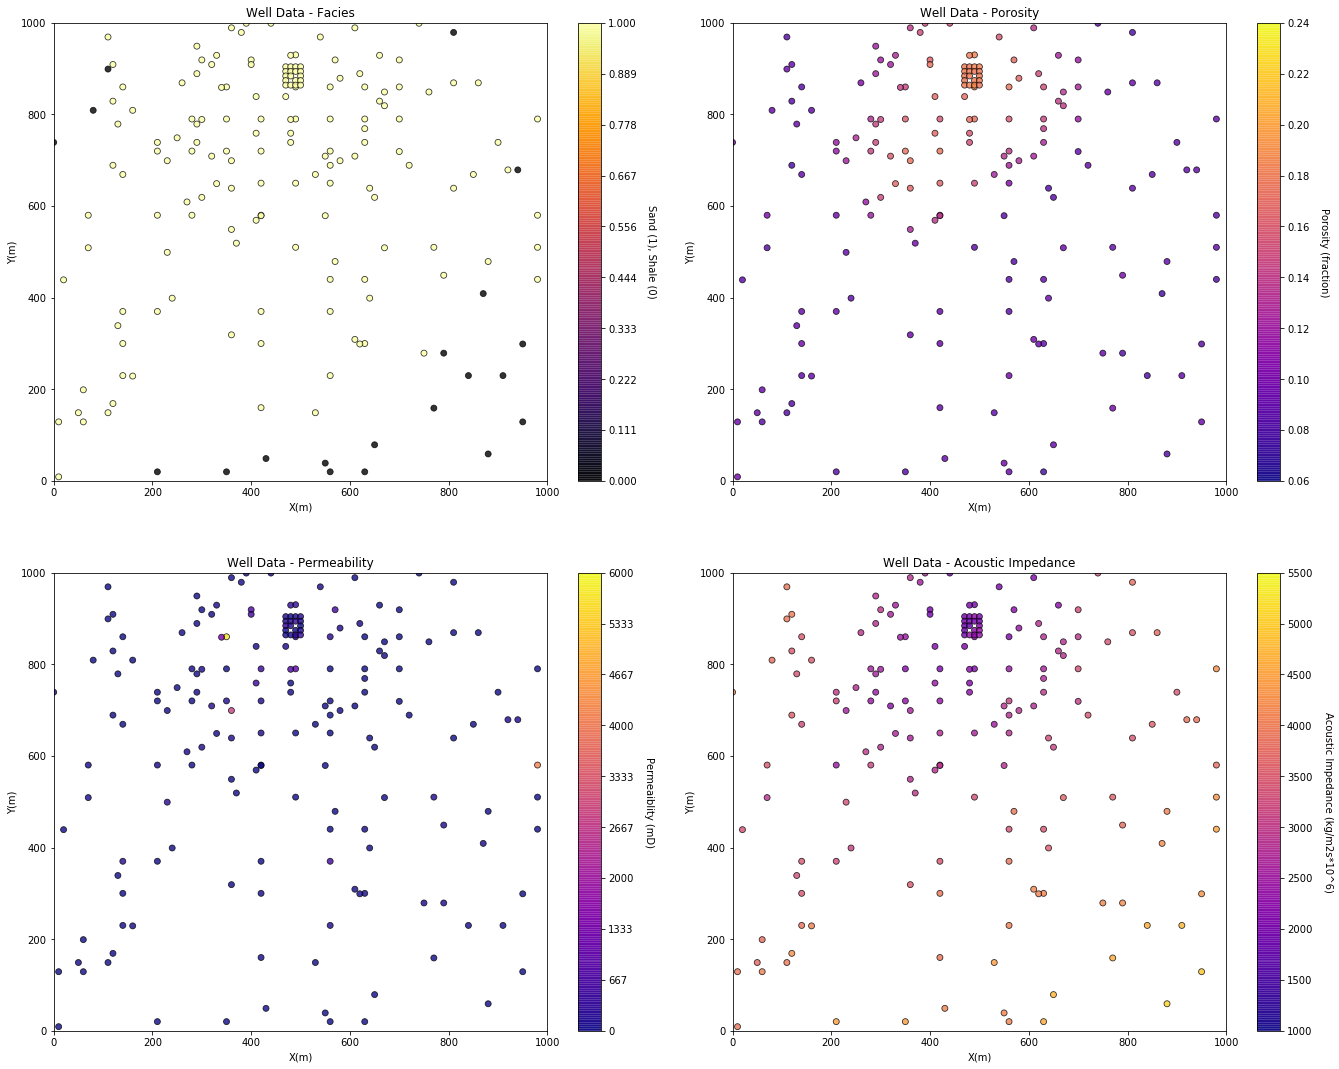

In [8]:
## 1) Location map 

# Define initial setting
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.0; pormax = 0.2;             # range of porosity values
permmin = 0.01; permmax = 6000;
AImin = 1000.0; AImax = 5500
Fmin = 0; Fmax = 1

cmap = plt.cm.plasma                    # color map

# Draw location
plt.subplot(221)
GSLIB.locmap_st(df_subset,'X','Y','Facies',xmin,xmax,ymin,ymax,Fmin,Fmax,'Well Data - Facies','X(m)','Y(m)','Sand (1), Shale (0)',plt.cm.inferno)

plt.subplot(222)
GSLIB.locmap_st(df_subset,'X','Y','Porosity',xmin,xmax,ymin,ymax,0.06,0.24,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(223)
GSLIB.locmap_st(df_subset,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin,permmax,'Well Data - Permeability','X(m)','Y(m)','Permeaiblity (mD)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df_subset,'X','Y','AI',xmin,xmax,ymin,ymax,AImin,AImax,'Well Data - Acoustic Impedance','X(m)','Y(m)','Acoustic Impedance (kg/m2s*10^6)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.1, hspace=0.2)
plt.savefig('All_location_maps.tif',dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
## Code without using Dr. Pyrcz's
X_loc = df_subset.values[:,0]
Y_loc = df_subset.values[:,1]
plt.scatter(X_loc, Y_loc, s=10)
plt.title('Location map')
plt.xlabel('X axis, m')
plt.ylabel('Y axis, m')
plt.axis([0,1000,0,1000])
plt.axis('scaled') 
plt.show()

# plt.savefig('Location Map of well data')

### 2) Histogram

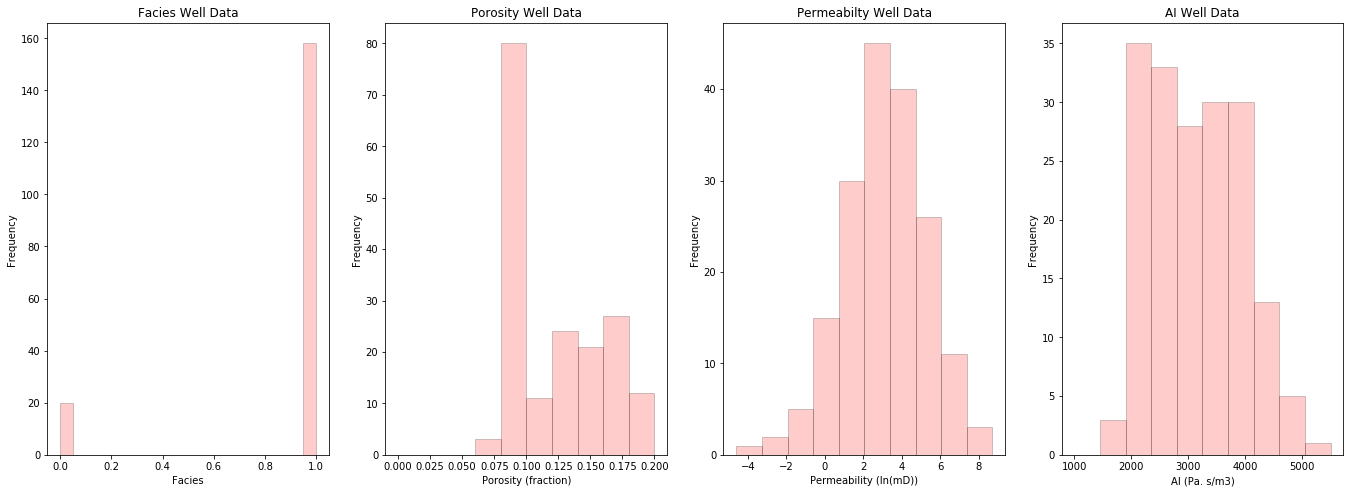

In [68]:
plt.subplot(141)
GSLIB.hist_st(df['Facies'].values,Fmin,Fmax,log=False,cumul = False,bins=20,weights = None,xlabel='Facies',title='Facies Well Data')

plt.subplot(142)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(143)
GSLIB.hist_st(np.log(df['Perm'].values),np.log(permmin),np.log(permmax),log=False,cumul = False,bins=10,weights = None,xlabel='Permeability (ln(mD))',title='Permeabilty Well Data')

plt.subplot(144)
GSLIB.hist_st(df['AI'].values,AImin,AImax,log=False,cumul = False,bins=10,weights = None,xlabel='AI (Pa. s/m3)',title='AI Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.1)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

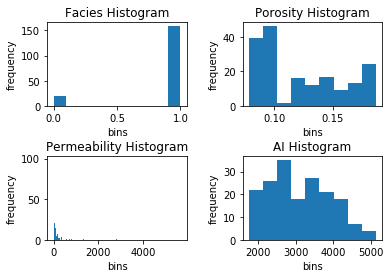

In [90]:
## Code without using Dr. Pyrcz's
Facies = df_subset.values[:,2]
Poro = df_subset.values[:,3]
Perm = df_subset.values[:,4]
AI = df_subset.values[:,5]

plt.subplots_adjust(wspace=0.4, # wspace controls the width of space between subplots
                    hspace=0.6)  # hspace controls the hight of space between subplots

plt.subplot(221)
plt.hist(Facies,bins = 10)
plt.title('Facies Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(222)
plt.hist(Poro,bins = 'auto')
plt.title('Porosity Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(223)
plt.hist(Perm,bins = 'auto')
plt.title('Permeability Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(224)
plt.hist(AI,bins = 'auto')
plt.title('AI Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.show()

### 3) summary statistics

In [76]:
print('Facies') 
print(stats.describe(Facies))
print('Porosity') 
print(stats.describe(Poro))
print('Permeability') 
print(stats.describe(Perm))
print('Acoustic Impedence') 
print(stats.describe(AI))

Facies
DescribeResult(nobs=178, minmax=(0.0, 1.0), mean=0.88764044943820219, variance=0.10029835586872338, skewness=-2.45490983102863, kurtosis=4.026582278481017)
Porosity
DescribeResult(nobs=178, minmax=(0.078601286797864128, 0.1863112059530446), mean=0.12249127893417977, variance=0.0012350787339198525, skewness=0.4581540362108679, kurtosis=-1.31552041436173)
Permeability
DescribeResult(nobs=178, minmax=(0.027218354189205173, 5689.8234201751939), mean=162.37275649774085, variance=342659.09171019658, skewness=7.250547282615892, kurtosis=57.75073683691917)
Acoustic Impedence
DescribeResult(nobs=178, minmax=(1759.4032622726911, 5124.532353793652), mean=3115.4246947634442, variance=637547.19645498332, skewness=0.2917414656256699, kurtosis=-0.8862453957746519)


In [24]:
df_subset.describe().transpose().iloc[2:6]

,count,mean,std,min,25%,50%,75%,max
Facies,178.0,0.887640,0.316699,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,178.0,0.122491,0.035144,0.078601,0.091162,0.116853,0.151399,0.186311
Perm,178.0,162.372756,585.370901,0.027218,5.745164,23.820284,90.555638,5689.823420
AI,178.0,3115.424695,798.465526,1759.403262,2439.938679,2937.328224,3787.043657,5124.532354


### 4) Outlier
It seems there are some outlier in permeability data

In [75]:
# Defined boxplot function
def boxplot(array,xmin,xmax,ylabel,title,fig_name):
    plt.figure(figsize=(8,6))
    cs = plt.boxplot(array)
    plt.axis([0,2,xmin,xmax])
    plt.title(title)
    plt.ylabel(ylabel);    
    plt.show()
    image_type = 'tif'; dpi = 600
    plt.savefig(fig_name + '.' + image_type,dpi=dpi)    
    return

def boxplot_st(array,xmin,xmax,ylabel,title):
    cs = plt.boxplot(array)
    plt.axis([0,2,xmin,xmax])
    plt.title(title)
    plt.ylabel(ylabel);
    return

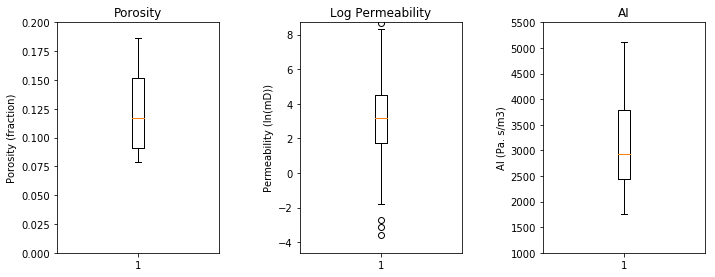

In [95]:
# Draw Boxplots
plt.subplot(131)
boxplot_st(df_subset['Porosity'].values,pormin,pormax,ylabel='Porosity (fraction)',title='Porosity')

plt.subplot(132)
boxplot_st(np.log(df_subset['Perm'].values),np.log(permmin),np.log(permmax),ylabel='Permeability (ln(mD))',title='Log Permeability')

plt.subplot(133)
boxplot_st(df_subset['AI'].values,AImin,AImax,ylabel='AI (Pa. s/m3)',title='AI')


plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.5, hspace=0.2)
plt.show()

plt.savefig('BoxPlot.tif',dpi=600,bbox_inches="tight")


# 3. Compare the well-based and seismic acoustic impedance


In [120]:
# Comparing with statistic
print('The average of well data AI is %.2f' %(np.mean(df_subset['AI'].values)))
print('whereas, the average of AI map is %.2f \n' %(np.mean(AI_map.flatten())))

print('The STD of well data AI is %.2f' %(np.std(df_subset['AI'].values)))
print('whereas, the STD of AI map is %.2f \n' %(np.std(AI_map.flatten())))

P10_AI_well, P50_AI_well, P90_AI_well = np.percentile(df_subset['AI'].values,[0.10, 0.50, 0.90])
P10_AI_map, P50_AI_map, P90_AI_map = np.percentile(AI_map.flatten(),[0.10, 0.50,0.90])
print('P10, P50, and P90 of well data AI is %.2f, %.2f, and %.2f, respectively' %(P10_AI_well,P50_AI_well, P90_AI_well))
print('whereas, P10, P50, and P90 of AI map is %.2f, %.2f, and %.2f, respectively \n' %(P10_AI_map, P50_AI_map, P90_AI_map))


The average of well data AI is 3115.42
whereas, the average of AI map is 3610.00 

The STD of well data AI is 796.22
whereas, the STD of AI map is 722.00 

P10, P50, and P90 of well data AI is 1772.30, 1823.91, and 1862.27, respectively
whereas, P10, P50, and P90 of AI map is 1819.92, 1942.48, and 1987.97, respectively 



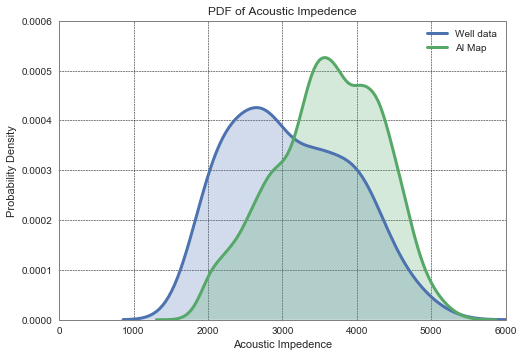

In [167]:
# Comparing with PDF or CDF
import seaborn as sns
plt.clf()

sns.distplot(df_subset['AI'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Well data' )
sns.distplot(AI_map.flatten(), hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'AI Map' )

plt.title('PDF of Acoustic Impedence')
plt.xlabel('Acoustic Impedence')
plt.ylabel('Probability Density')
plt.axis([0, 6000,0,0.0006])
ax = plt.gca()
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.grid('on',color='k', linestyle='--', linewidth=0.5)


plt.show()
plt.savefig('PDF of AI sample and map',dpi=600)


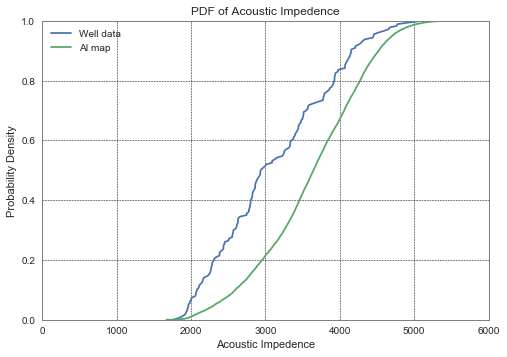

In [181]:
# Comparing with PDF or CDF

Sort_well = np.sort(df_subset['AI'].values)
Sort_map = np.sort(AI_map.flatten())

p_well = 1.* np.arange(len(Sort_well))/(len(Sort_well)-1)
p_map = 1.* np.arange(len(Sort_map))/(len(Sort_map)-1)


fig1 = plt.plot(Sort_well,p_well)
fig2 = plt.plot(Sort_map, p_map)

plt.legend((fig1[0],fig2[0]),('Well data', 'AI map'))
plt.title('PDF of Acoustic Impedence')
plt.xlabel('Acoustic Impedence')
plt.ylabel('Probability Density')
plt.axis([0, 6000,0, 1])
ax = plt.gca()
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.grid('on',color='k', linestyle='--', linewidth=0.5)

plt.show()
plt.savefig('CDF of AI sample and map',dpi=600)


Comment: Sample and total data set shows different statistics, PDF and CDF.

# 4. Plot location map: wells and map of AI

In [98]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
gcsize = 10.0;                          # grid cell size

10.0


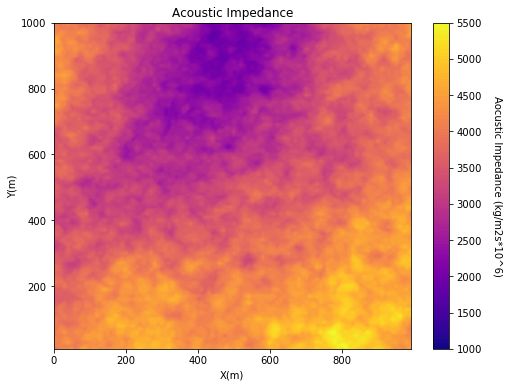

In [105]:
GSLIB.pixelplt(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,'Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')


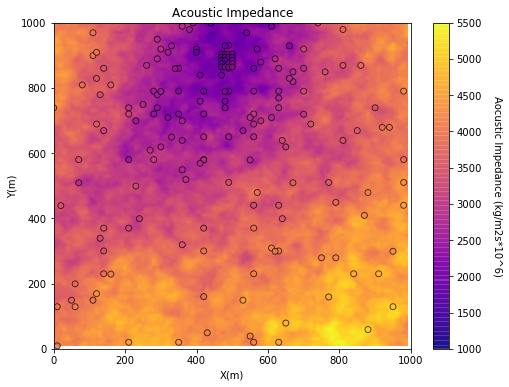

In [106]:
GSLIB.locpix(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df_subset,'X','Y','AI','Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')

Comment: well data are sampled mainly in the low AI zone. Looks like slighty biased sample.